In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
import pandas as pd
from types import new_class
import warnings
import os

# Desativar mensagens de aviso de depreciação
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
plot_name = "reinforcement-learning-2tanques"
path = f'/content/drive/MyDrive/Colab Notebooks/Mestrado/Final/Data/{plot_name}'
if not os.path.exists(path):
  os.makedirs(path)
os.chdir(path)
print(f'O diretório atual é: {os.getcwd()}')

O diretório atual é: /content/drive/MyDrive/Colab Notebooks/Mestrado/Final/Data/reinforcement-learning-2tanques


In [ ]:
def plot_sim_history(sim_history_x1, sim_history_x2):
  plt.figure(figsize=(16, 10))  # Define o tamanho do gráfico

  plt.subplot(3, 1, 1)
  plt.plot(sim_history_x1['x'], label='x1')
  plt.plot(sim_history_x1['ref'], label='ref1', linestyle=':')
  plt.plot(sim_history_x2['x'], label='x2')
  plt.plot(sim_history_x2['ref'], label='ref2', linestyle=':')
  plt.xlabel("Steps/Time(s)")
  plt.ylabel("Level(m)")
  plt.title('Controle Aprendizado Por Reforço - Tanques Conectados')
  plt.legend()
  plt.grid(True)  # Adiciona uma grade ao gráfico
  plt.tight_layout()  # Ajusta o layout

  plt.subplot(3, 1, 2)
  plt.plot(sim_history_x1['qe'], label='qe')
  plt.plot(sim_history_x1['qs'], label='qs')
  plt.ylabel("(m^3/s)")
  plt.title('Sinal Aprendizado Por Reforço - Tanques Conectados')
  plt.legend()
  plt.grid(True)  # Adiciona uma grade ao gráfico
  plt.tight_layout()  # Ajusta o layout


  plt.subplot(3, 1, 3)
  plt.plot(sim_history_x1['erro'], label='erro')
  plt.ylabel("erro (m)")
  plt.title('Erro Aprendizado Por Reforço - Tanques Conectados')
  plt.legend()
  plt.grid(True)  # Adiciona uma grade ao gráfico
  plt.tight_layout()  # Ajusta o layout

  plt.show()

In [ ]:
def plot_sim_history(sim_history_x1, sim_history_x2):
  dpi = 600
  size_view = (16, 10)
  size_fig = (20, 5)

  fig, axs = plt.subplots(3, 1, figsize=size_view)

  axs[0].plot(sim_history_x1['x'], label='x1')
  axs[0].plot(sim_history_x1['ref'], label='ref1', linestyle=':')
  axs[0].plot(sim_history_x2['x'], label='x2')
  axs[0].plot(sim_history_x2['ref'], label='ref2', linestyle=':')

  axs[0].set_xlabel("Steps/Time(s)")
  axs[0].set_ylabel("Level(m)")
  axs[0].set_title('Controle Aprendizado Por Reforço - Tanques Conectados')
  axs[0].set_xticks(np.arange(0, 1100, 100))
  axs[0].set_xlim(0, 1000)
  axs[0].legend()
  axs[0].grid(True)  # Adiciona uma grade ao gráfico

  axs[1].plot(sim_history_x1['qe'], label='qe')
  axs[1].plot(sim_history_x2['qe'], label='qc')

  axs[1].set_ylabel("(m^3/s)")
  axs[1].set_title('Sinal Aprendizado Por Reforço - Tanques Conectados')
  axs[1].set_xticks(np.arange(0, 1100, 100))
  axs[1].set_xlim(0, 1000)
  axs[1].legend()
  axs[1].grid(True)  # Adiciona uma grade ao gráfico

  axs[2].plot(sim_history_x1['erro'], label='erro1')
  axs[2].plot(sim_history_x2['erro'], label='erro2')
  axs[2].plot((sim_history_x1['erro'] + sim_history_x2['erro']) / 2, label='erro médio')

  axs[2].set_ylabel("erro (m)")
  axs[2].set_title('Erro Aprendizado Por Reforço - Tanques Conectados')
  axs[2].set_xticks(np.arange(0, 1100, 100))
  axs[2].set_xlim(0, 1000)
  axs[2].legend()
  axs[2].grid(True)  # Adiciona uma grade ao gráfico


  fig.tight_layout()  # Ajusta o layout

  fig.savefig(f'{plot_name}.png', format='png', dpi=dpi)

  # Salvar cada subplot individualmente
  for i, ax in enumerate(axs):
      # Criar uma nova figura para cada subplot
      fig_single, ax_single = plt.subplots(figsize=size_fig)
      # Copiar o conteúdo do subplot original para a nova figura
      for line in ax.get_lines():
          ax_single.plot(line.get_xdata(), line.get_ydata(), label=line.get_label(), linestyle=line.get_linestyle())
      ax_single.set_xlim(ax.get_xlim())
      ax_single.set_ylim(ax.get_ylim())
      ax_single.set_xticks(ax.get_xticks())
      ax_single.set_title(ax.get_title())
      ax_single.set_xlabel(ax.get_xlabel())
      ax_single.set_ylabel(ax.get_ylabel())
      ax_single.legend()
      ax_single.grid(True)  # Adiciona uma grade ao gráfico

      # Salvar a figura individual
      fig_single.tight_layout()
      fig_single.savefig(f'{plot_name}-{i + 1}.png', format='png', dpi=dpi)
      plt.close(fig_single)  # Fechar a figura para liberar memória

  plt.show()

In [ ]:
class TankEnvirolment:
    def __init__(self, initial_x1, initial_x2, initial_qe, initial_qs, initial_vc, ref1, ref2):

        self.ref1 = ref1
        self.ref2 = ref2

        self.initial_x1 = initial_x1
        self.initial_x2 = initial_x2

        self.initial_qe = initial_qe
        self.initial_qs = initial_qs
        self.initial_vc = initial_vc

        self.x1 = self.initial_x1
        self.x2 = self.initial_x2

        self.qe = self.initial_qe
        self.vc = self.initial_vc
        self.qc = 0

        self.last_x1 = self.x1
        self.last_x2 = self.x2

        self.last_ref1 = self.ref1
        self.last_ref2 = self.ref2

        # Process Const
        self.area = 4
        self.max_level = 12
        self.k1 = 1.6
        self.k2 = 1
        self.ts = 0.2

        self.state_table = list(np.round(np.arange(-self.max_level, self.max_level + 0.01, 0.01), 2))

        self.action_table = list(np.round(np.arange(0, 1.1, 0.01), 2))

        self.num_states = len(self.state_table)
        self.num_actions = len(self.action_table)

        self.reset();

    def System_To_RL_State(self):

        state_x1 = np.round(self.x1 - self.ref1, 2)
        state_x1 = np.clip(state_x1, -self.max_level, self.max_level, out=None)
        state_index_x1 = self.state_table.index(state_x1)

        state_x2 = np.round(self.x2 - self.ref2, 2)
        state_x2 = np.clip(state_x2, -self.max_level, self.max_level, out=None)
        state_index_x2 = self.state_table.index(state_x2)

        return state_index_x1, state_index_x2

    def step(self, a1, a2):

        self.last_x1 = self.x1
        self.last_x2 = self.x2

        self.last_ref1 = self.ref1
        self.last_ref2 = self.ref2

        # Getting the Actual action
        self.qe, self.vc = self.get_action(a1, a2)

        # Finding the steady state of the system corresponding to the action 'A'
        self.x1, self.qc = self.tank_rk(self.x1, self.qe, self.vc, self.k1, self.ts)
        self.x2, self.qs = self.tank_rk(self.x2, self.qc, 100    , self.k2, self.ts)

        reward1, reward2 = self.reward_calc()

        next_s1, next_s2 = self.System_To_RL_State()

        if self.state_table[next_s1] == 0 and self.state_table[next_s2] == 0:
            done = True
        else:
            done = False

        return next_s1, next_s2, reward1, reward2, done


    def get_action(self, a1, a2):

        qe = 4.0 * self.action_table[a1]
        qe = max(0, qe)
        qe = min(4, qe)

        vc = self.action_table[a2] * 100

        return qe, vc

    def reward_calc(self):
        if self.ref1 != self.last_ref1:
          reward1 = 0;
        else:
          erro = abs(self.ref1 - self.x1)
          if erro < 0.1:
            reward1 = (0.1 - erro) * 10
          else:
            reward1 = 0

        if self.ref2 != self.last_ref2:
          reward2 = 0;
        else:
          erro = abs(self.ref1 - self.x1)
          if erro < 0.1:
            reward2 = (0.1 - erro) * 10
          else:
            reward2 = 0

        return reward1, reward2

    def tank_xdot(self, x, qe, valve=100, valve_k = 1):
      if x >= 0:
        qs = valve_k * (valve / 100) * math.sqrt(x)
      else:
        qs = 0
      xd = (qe - qs) / self.area
      return xd, qs

    def tank_rk(self, x0, qe, valve=100, valve_k = 1, t=0.2):
      a=x0
      b=qe
      c=valve
      #call 1
      xd, qs = self.tank_xdot(x0, qe, valve, valve_k);
      savex0 = x0;
      phi = xd;
      x0 = savex0 + 0.5 * t * xd;

      #call two
      xd, qs = self.tank_xdot(x0, qe, valve, valve_k);
      phi = phi + 2 * xd;
      x0 = savex0 + 0.5 * t * xd;

      #call three
      xd, qs = self.tank_xdot(x0, qe, valve, valve_k);
      phi = phi + 2 * xd;
      x0 = savex0 + t * xd;

      #call four
      xd, qs = self.tank_xdot(x0, qe, valve, valve_k);
      x = savex0 + (phi + xd) * t / 6;

      if x < 0:
        x = 0

      if x > self.max_level:
        x = self.max_level

      if np.isnan(x):
        x = 0

      if np.isnan(qs):
        qs = 0

      return x, qs;

    def reset(self):
        self.x1 = self.initial_x1
        self.x2 = self.initial_x2

        self.qe = self.initial_qe
        self.vc = self.initial_vc
        self.qc = 0

        self.last_x1 = self.x1
        self.last_x2 = self.x2

        self.last_ref1 = self.ref1
        self.last_ref2 = self.ref2

In [ ]:
class TankAgent:
    def __init__(self, alpha = 0.1, gamma = 0.9, epsilon = 1, num_states = None, num_actions = None):
        self.alpha = alpha;
        self.gamma = gamma;
        self.epsilon = epsilon;

        self.num_states = num_states
        self.num_actions = num_actions

        self.q_table_x1 = self.init_q_table();
        self.q_table_x2 = self.init_q_table();

    def e_greedy_policy(self, s1, s2):
        """
        This function performs the epsilon greedy action selection
        :param no_a: No. of actions available
        :param e: Exploration parameter
        :param q: Action value function for the current state
        :return: epsilon greedy action
        """
        if np.random.rand() < self.epsilon:
            a1 = np.random.randint(0, self.num_actions)
            a2 = np.random.randint(0, self.num_actions)
        else:
            a1 = np.argmax(self.q_table_x1[s1,:])
            a2 = np.argmax(self.q_table_x1[s2,:])

        return a1, a2

    def init_q_table(self, type="zeros"):
        '''
        This function initializes the table of Action-value function for each state and action.
        :param s: No. of states
        :param a: NO. of possible action available
        :param type: "zeros", "Ones", "Random"
        :return: s x a dimensional matrix for action value function Q(s, a).
        '''
        if type == "ones":
            q = np.ones((self.num_states, self.num_actions))

        if type == "zeros":
            q = np.zeros((self.num_states, self.num_actions))

        if type == "random":
            q = np.random.random((self.num_states, self.num_actions))

        return q

    def update_q_table_x1(self, s, a, reward, next_s):
        '''
        Q(s, a) = Q(s, a) + α * [R + γ * max(Q(s', a')) - Q(s, a)]

        Q(s, a) é o valor atual da tabela Q para o par estado-ação.
        α (alfa) é a taxa de aprendizado, que controla o quão rápido os valores da tabela Q são atualizados.
        R é a recompensa imediata recebida após a ação.
        γ (gama) é o fator de desconto que pondera a importância das recompensas futuras.
        max(Q(s', a')) é a estimativa do valor futuro do próximo estado s' e ação a'.
        '''
        max_a = np.argmax(self.q_table_x1[next_s,:])
        self.q_table_x1[s, a] += self.alpha * (reward + self.gamma * self.q_table_x1[next_s, max_a] - self.q_table_x1[s, a])

    def update_q_table_x2(self, s, a, reward, next_s):
        max_a = np.argmax(self.q_table_x2[next_s,:])
        self.q_table_x2[s, a] += self.alpha * (reward + self.gamma * self.q_table_x2[next_s, max_a] - self.q_table_x2[s, a])

    def save_q_table(self, name = 'Q_Mattrix'):
      np.savetxt(name+'_x1', self.q_table_x1)
      np.savetxt(name+'_x2', self.q_table_x2)

    def load_q_table(self, name = 'Q_Mattrix'):
      self.q_table_x1 = np.loadtxt(name+'_x1')
      self.q_table_x2 = np.loadtxt(name+'_x2')

In [ ]:
def train(alpha = 0.1, gamma = 0.9, epsilon = 1, episodes = 1000, max_step = 500):
    '''
    Training of the level controller in the RL - Environment by TD-Q learning
    '''

    train_history_columns = ["qe", "qs", "x", "ref", "erro", "s", "value_s", "a", "value_a", "next_s", "value_next_s", "reward", "done"]
    train_history_x1 = []
    train_history_x2 = []

    # Initializing TankLevel Environment and Agent
    env = TankEnvirolment(initial_x1=0, initial_x2=0, initial_qe=2, initial_qs=2, initial_vc=100, ref1=6, ref2=6)
    agent = TankAgent(alpha = alpha, gamma = gamma, epsilon = epsilon, num_states = env.num_states, num_actions = env.num_actions)

    # Episode Loop
    for i in tqdm(range(episodes)):
        env.reset()
        t = 0

        # Changing the Set point every 10 episode
        if i>0 and i % 100 == 0:
            env.ref1 = np.random.choice(np.arange(0, 13, 0.5))
            env.ref2 = np.random.choice(np.arange(0, 13, 0.5))

        # Changing the exploration parameter every 50 episode
        if i>0 and i% 200 == 0:
            agent.epsilon = max(0.1, epsilon - 0.01)

        # Step loop
        while t < max_step:

            s1, s2 = env.System_To_RL_State()

            a1, a2 = agent.e_greedy_policy(s1, s2)

            # Taking a step in the environment
            next_s1, next_s2, reward1, reward2, done = env.step(a1, a2)

            # Action-value function update
            agent.update_q_table_x1(s1, a1, reward1, next_s1)
            agent.update_q_table_x2(s2, a2, reward2, next_s2)

            train_history_x1.append([env.qe, env.qc, env.x1, env.ref1, env.x1-env.ref1, s1, env.state_table[s1], a1, env.action_table[a1], next_s1, env.state_table[next_s1], reward1, done])
            train_history_x2.append([env.qc, env.qs, env.x2, env.ref2, env.x2-env.ref2, s2, env.state_table[s2], a2, env.action_table[a2], next_s2, env.state_table[next_s2], reward2, done])

            t += 1

            if done:
              print(f"success in episode: {i} step: {t}")

    agent.save_q_table()
    train_history_x1=pd.DataFrame(data=train_history_x1, columns=train_history_columns)
    train_history_x2=pd.DataFrame(data=train_history_x2, columns=train_history_columns)
    return train_history_x1, train_history_x2, agent.q_table_x1, agent.q_table_x2, env.state_table, env.action_table
train_history_x1, train_history_x2, q_table_x1, q_table_x2, states_table, action_table = train(alpha = 0.1, gamma = 0.9, epsilon = 1, episodes = 10000, max_step = 500)
train_history_x1.to_csv('train_history_x1.csv', index=False)
train_history_x2.to_csv('train_history_x2.csv', index=False)

 31%|███▏      | 3125/10000 [04:39<09:21, 12.25it/s]

success in episode: 3123 step: 437


 77%|███████▋  | 7684/10000 [11:18<03:29, 11.06it/s]

success in episode: 7682 step: 202


 77%|███████▋  | 7698/10000 [11:19<03:37, 10.56it/s]

success in episode: 7697 step: 181


 77%|███████▋  | 7706/10000 [11:20<03:15, 11.74it/s]

success in episode: 7704 step: 347


100%|██████████| 10000/10000 [14:40<00:00, 11.35it/s]


100%|██████████| 1000/1000 [00:00<00:00, 3437.25it/s]


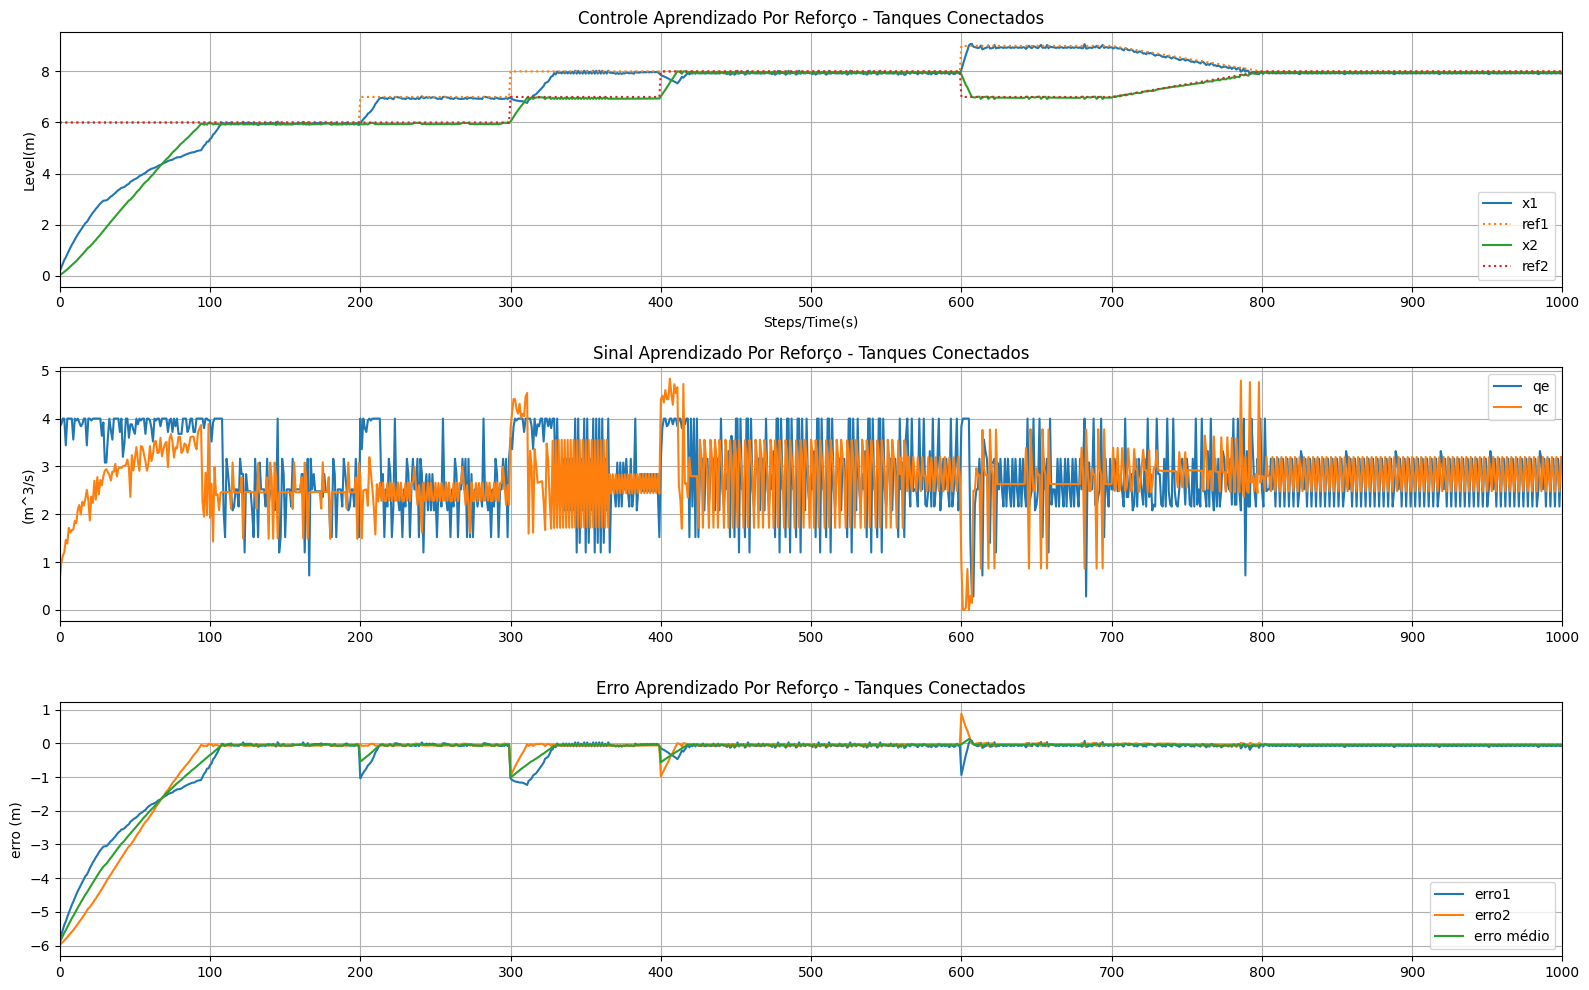

In [ ]:
#Simulation Parameters
num_sim = 1000
ref1 = 6
ref2 = 6

env = TankEnvirolment(initial_x1=0, initial_x2=0, initial_qe=2, initial_qs=2, initial_vc=100, ref1=ref1, ref2=ref2)
agent = TankAgent(alpha = 0.1, gamma = 0.9, epsilon = 0.0, num_states = env.num_states, num_actions = env.num_actions)
agent.load_q_table()

#Set initial conditions
sim_history_columns = ["qe", "qs", "x", "ref", "erro", "s", "value_s" , "a", "value_a", "next_s", "value_next_s", "reward", "done"]
sim_history_x1 = []
sim_history_x2 = []

#Start Simulation
for run in tqdm(range(num_sim)):

    if run == 200:
      ref1 += 1;

    if run == 300:
      ref1 += 1;
      ref2 += 1;

    if run == 400:
      ref2 += 1;

    if run == 600:
      ref1 += 1;
      ref2 -= 1;

    if 700 < run <= 800:
      ref1 -= 1/100;
      ref2 += 1/100;

    env.ref1 = ref1
    env.ref2 = ref2

    s1, s2 = env.System_To_RL_State()
    a1, a2 = agent.e_greedy_policy(s1,s2)

    next_s1, next_s2, reward1, reward2, done = env.step(a1, a2)

    agent.update_q_table_x1(s1, a1, reward1, next_s1)
    agent.update_q_table_x2(s2, a2, reward2, next_s2)

    sim_history_x1.append([env.qe, env.qc, env.x1, env.ref1, env.x1-env.ref1, s1, env.state_table[s1], a1, env.action_table[a1], next_s1, env.state_table[next_s1], reward1, done])
    sim_history_x2.append([env.qc, env.qs, env.x2, env.ref2, env.x2-env.ref2, s2, env.state_table[s2], a2, env.action_table[a2], next_s2, env.state_table[next_s2], reward2, done])

sim_history_x1=pd.DataFrame(data=sim_history_x1, columns=sim_history_columns)
sim_history_x2=pd.DataFrame(data=sim_history_x2, columns=sim_history_columns)
sim_history_x1.to_csv('sim_history_x1.csv', index=False)
sim_history_x2.to_csv('sim_history_x2.csv', index=False)
plot_sim_history(sim_history_x1, sim_history_x2)